# Loan From Prosper Data Exploration
## by Okonkwo Ifeanyichukwu

## Introduction
> This document explores a dataset containing a loan from Proper. It includes loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
#Select 14 varibales to explore in this document out of 81 available varibles
loans = loans[['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate',
               'ListingCategory (numeric)', 'EmploymentStatus','IsBorrowerHomeowner','IncomeVerifiable',
               'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment']]

In [4]:
#Drop row with missing value for BorrowerAPR column
loans = loans.drop(loans[loans['BorrowerAPR'].isnull()].index)

We dropped rows with missing BorrowAPR.Their LoanStatus are `Completed`, 0 ListingCategory, No EmploymentStatus, Borrower is not homeowner. IncomeRange is `not displayed` even though is verifiable and all is in between 2005 November to January 2006

In [5]:
#Replace rows with missing value for EmploymentStatus with 'Other'
loans['EmploymentStatus']=loans['EmploymentStatus'].fillna('Other')

In [6]:
#Convert ListingCreationDate and  LoanOriginationDate to datatime datatype
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

# Convert the LoanStatus  and EmploymentStatus to categorical datatype
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')

In [7]:
#Order of LoanStatus 
loanstatus_ord = ['Current','Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (15-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled','Chargedoff', 'Defaulted']
loans['LoanStatus'] = loans['LoanStatus'].cat.set_categories(loanstatus_ord)

In [8]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113912, 14)
ListingNumber                         int64
ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                         category
BorrowerAPR                         float64
BorrowerRate                        float64
ListingCategory (numeric)             int64
EmploymentStatus                   category
IsBorrowerHomeowner                    bool
IncomeVerifiable                       bool
StatedMonthlyIncome                 float64
LoanOriginalAmount                    int64
LoanOriginationDate          datetime64[ns]
MonthlyLoanPayment                  float64
dtype: object
   ListingNumber     ListingCreationDate  Term LoanStatus  BorrowerAPR  \
0         193129 2007-08-26 19:09:29.263    36  Completed      0.16516   
1        1209647 2014-02-27 08:28:07.900    36    Current      0.12016   
2          81716 2007-01-05 15:00:47.090    36  Completed      0.28269   
3         658116 2012-10-22 11:02:35.010    36    Current    

In [9]:
# descriptive statistics for numeric variables
print(loans.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139120e+05  113912.000000  113912.000000  113912.000000   
mean    6.280235e+05      40.831308       0.218828       0.192786   
std     3.279803e+05      10.437112       0.080364       0.074809   
min     7.000000e+01      12.000000       0.006530       0.000000   
25%     4.012110e+05      36.000000       0.156290       0.134000   
50%     6.006245e+05      36.000000       0.209760       0.184000   
75%     8.927982e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

       ListingCategory (numeric)  StatedMonthlyIncome  LoanOriginalAmount  \
count              113912.000000         1.139120e+05       113912.000000   
mean                    2.774817         5.606973e+03         8338.015661   
std                     3.997024         7.478338e+03         6245.940592   
min                     0.000000         0.000000e+00         1000.000

### What is the structure of your dataset?

>There are 113, 912 loans in ther dataset with 14 features (ListingNumber, ListingCreationDate, Terms, LoanStatus,   BorrowerAPR, BorrowerRate, ListingCategory(numeric), EmploymentStatus, IsBorrowerHomeowner, IncomeVerifiable,     StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationDate and MonthlyLoanPayment). There are 7 numeric         variables, 2 datatime variable, 2 boolean varibales and 2 categorical variables.

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


### What is/are the main feature(s) of interest in your dataset?

> - What factors affect a loan’s outcome status?
> - What affects the borrower’s APR or interest rate?
> - Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that EmploymentStatus, MonthlyLoanPayment and StatedMonthlyIncome will have a greater impact loan's outcome status
> Also I expect that LoanOriginalAmount, Terms and MonthlyLoanPayment will have the strongest effect on borrower’s APR and interest rate

## Univariate Exploration

> In this section, We kick off by investigating the `BorrowerAPR` and `BorrowerRate` varibales


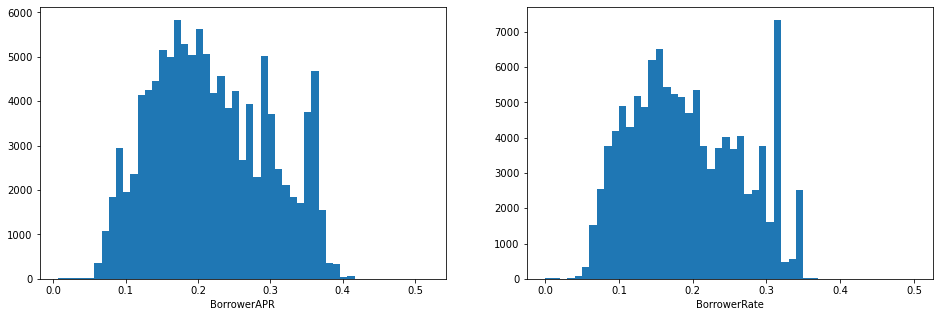

In [10]:
# re-using code to plot BorrowerAPR and BorrowerRate.
# start with a standard-scaled plot
fig, ax = plt.subplots(ncols=2, figsize = [16,5])

variables = ['BorrowerAPR', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loans[var]), max(loans[var])+0.01, 0.01)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

> Both BorrowAPR and BorrowRate are unimodal but the distribution are slightly skewed to the right than a normal distribuion with a big single spike in borrowerRate between 0.30 and 0.35. Maybe they are positivly correlated. 

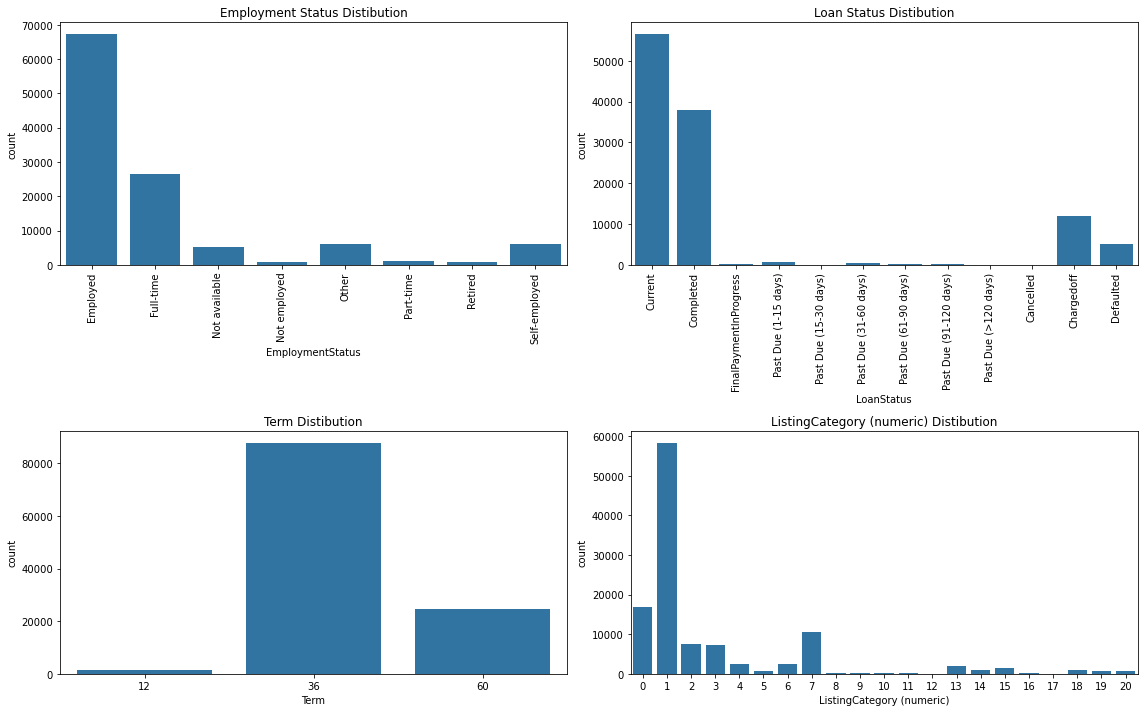

In [11]:
# let's plot all four together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2,ncols=2 ,figsize = [16,10])
default_color = sns.color_palette()[0]

ax1 = sns.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[0,0],)
ax1.title.set_text('Employment Status Distibution')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

ax2 = sns.countplot(data = loans, x = 'LoanStatus', color = default_color, ax = ax[0,1])
ax2.title.set_text('Loan Status Distibution')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

ax3 = sns.countplot(data = loans, x = 'Term', color = default_color, ax = ax[1,0])
ax3.title.set_text('Term Distibution')

ax4 = sns.countplot(data = loans, x = 'ListingCategory (numeric)', color = default_color, ax = ax[1,1])
ax4.title.set_text('ListingCategory (numeric) Distibution')
plt.tight_layout()
plt.show()

> Looking at the EmploymentStatus,majority of the borrower are employed, followed by Full-time worker. I wonder if loan are given out based on constant source of income. For the LoanStatus, Most are Current or completed, It's  shows it is only few of the loan pass due days. Term Shows that majority of the loans are to be paid within 36 months which is equivalent to 3 years or within 5 years with least within a year. Also for the ListingCategory plot,it shows that most of the loan are meant for debt consolidation.

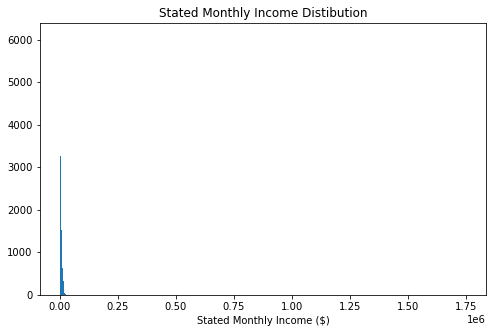

In [12]:
# start with a standard-scaled plot
bins = np.arange(0, loans['StatedMonthlyIncome'].max(), 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distibution')
plt.show()

> Most of the data is set to the far left of it axis, suggesting some strong outliers on the right.It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [13]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = (loans['StatedMonthlyIncome'] >45000)

print(high_outliers.sum())
print(loans.loc[high_outliers,:])

109
        ListingNumber     ListingCreationDate  Term  LoanStatus  BorrowerAPR  \
3274           339134 2008-05-26 09:19:12.707    36   Completed      0.06576   
4691           627856 2012-08-22 06:19:10.000    36   Completed      0.12528   
7577           657189 2012-10-19 20:33:59.943    36     Current      0.12528   
8066           500651 2011-04-02 13:58:32.227    36   Completed      0.35643   
8870            66246 2006-11-26 00:25:07.540    36  Chargedoff      0.12700   
...               ...                     ...   ...         ...          ...   
108154         743492 2013-04-04 19:36:27.030    36     Current      0.14857   
109043         869860 2013-08-14 09:58:58.250    36     Current      0.18214   
111265         814064 2013-06-19 06:54:27.577    60   Completed      0.20593   
113270         715718 2013-02-20 19:23:37.430    36     Current      0.22712   
113422         863075 2013-08-07 10:32:32.597    36     Current      0.22712   

        BorrowerRate  ListingCatego

> There are 109 outlier with unusually high values for monthly income. Most of them earn above 150000 dollar monthly  which is above the median and the third quartile.

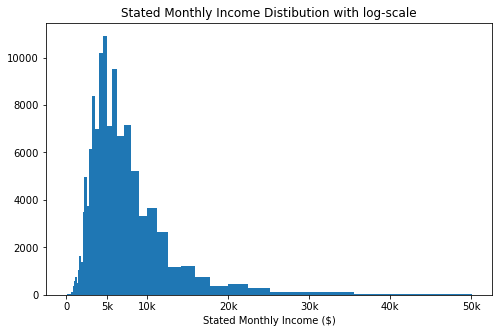

In [14]:
#There is a big outlier, so let consider max value 0.45e5 on a logscale
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(45000)+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins=bins)
plt.xticks([0, 5e3, 1e4, 2e4, 3e4, 4e4,5e4], ['0','5k', '10k', '20k', '30k', '40k','50k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distibution with log-scale')
plt.show()

> Plotting the stated Monthly Income without the outliers, show a unimodal and rightly skewed distribution.

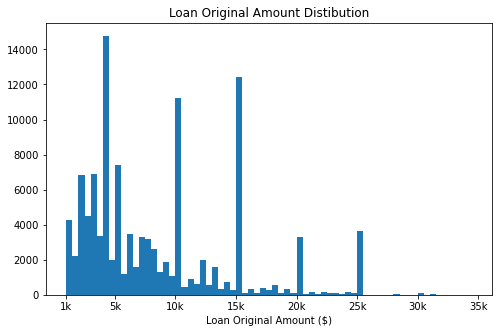

In [15]:

bins =np.arange(1000,loans['LoanOriginalAmount'].max(), 500)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins=bins)
plt.xticks([1e3,5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4], ['1k','5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distibution')
plt.show()

> The distribution show that the minimum loan amount is 1000 dollars, big spike around, 5k, 10k,15k,20k and 25k.

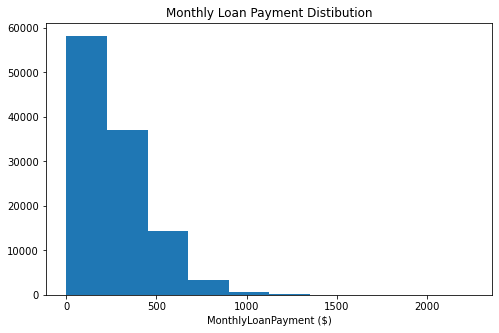

In [16]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment ($)')
plt.title('Monthly Loan Payment Distibution')
plt.show()

> Most of the data for Monthly Loan Payment is set to the left of it axis, suggesting some strong outliers on the right.It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [17]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = (loans['MonthlyLoanPayment'] >1300)

print(high_outliers.sum())
print(loans.loc[high_outliers,:][['MonthlyLoanPayment','LoanOriginalAmount']])

81
        MonthlyLoanPayment  LoanOriginalAmount
3627               1384.64               15000
5782               1300.32               15000
8572               2218.53               25000
12438              1359.26               15000
12654              1350.90               15000
...                    ...                 ...
110882             1359.26               15000
112271             1379.70               15000
112370             1351.61               15000
113021             1359.26               15000
113520             1720.04               20000

[81 rows x 2 columns]


> There are 81 outlier with unusually high values for monthly laon payment. Most of the payment are above 1300 dollar monthly  which is above the median and the third quartile MonthlyLoanPayment.It worth nothing that this payment are  mostly for original loan amount 15000 dollar which is above median and third quartile of LoanOriginalAmount column.

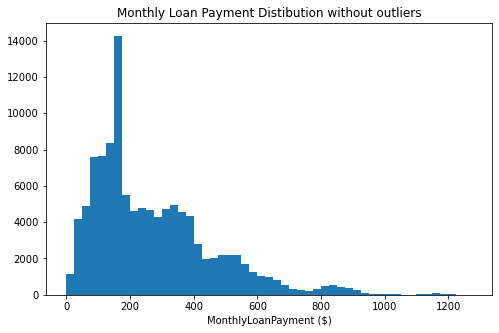

In [18]:
# re-plot the distribution of MonthlyLoanPayment without the outliers
bins =np.arange(0,1300, 25)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'MonthlyLoanPayment', bins=bins)
plt.xlabel('MonthlyLoanPayment ($)')
plt.title('Monthly Loan Payment Distibution without outliers')
plt.show()

> The distribution is also skewed to right like the initial plot with a well visible spike around 200 dollar.

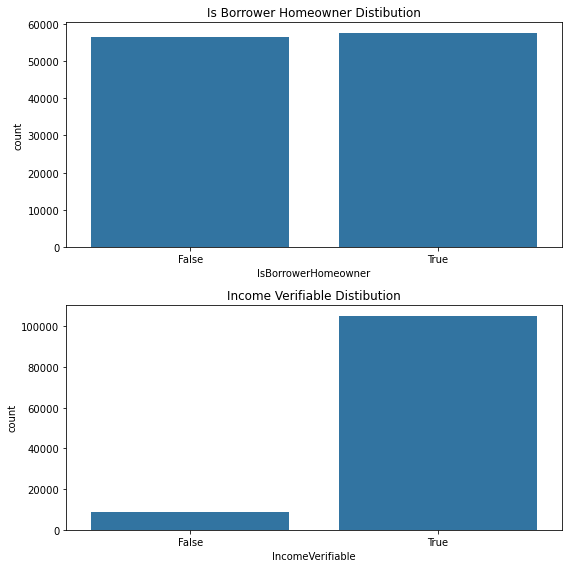

In [19]:
# let's plot all two together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sns.color_palette()[0]
ax1 = sns.countplot(data = loans, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0])
ax1.title.set_text('Is Borrower Homeowner Distibution')
ax2 = sns.countplot(data = loans, x = 'IncomeVerifiable', color = default_color, ax = ax[1])
ax2.title.set_text('Income Verifiable Distibution')
plt.tight_layout()
plt.show()

> For IsBorrowerHomeowner plot,it shows that slightly less than 50% of the borrowers are not home owner while IncomeVerifiable plot shows the majority of the borrowers income are verifiable.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The StatedMonthlyIncome variable took on a large range of values after excluding the outliers, so the data manipulated using a log transform. Under the transformation, the data looked unimodal and was skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the StatedMonthlyIncome and MonthlyLoanPayment variables, a number of outlier points were identified. Overall, these outliers are more than the median and above third quatile of the variable. For safety, all of these points were removed from the dataset to move forwards.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [20]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate','MonthlyLoanPayment', 'LoanOriginalAmount', 'StatedMonthlyIncome']
categoric_vars = ['EmploymentStatus', 'LoanStatus', 'Term','ListingCategory (numeric)']

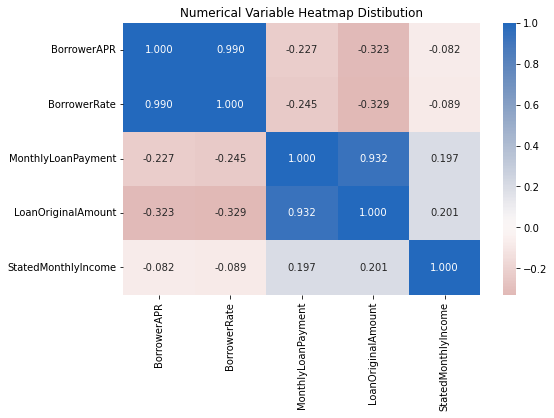

In [21]:
# correlation plot
plt.figure(figsize = [8, 5])
ax = sns.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
ax.title.set_text('Numerical Variable Heatmap Distibution')
plt.show()

loans.shape= (113912, 14)
loans_samp.shape= (200, 14)


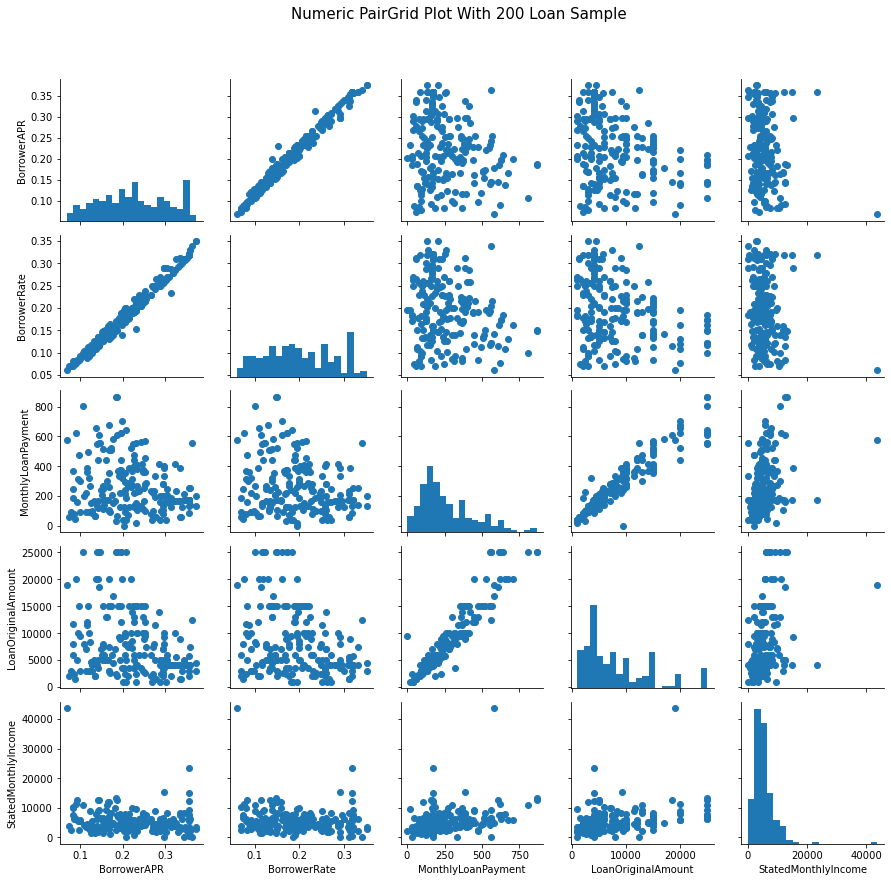

In [22]:
# plot matrix: sample 200 loan so that plots are clearer and they render faster
print("loans.shape=",loans.shape)
loans_samp = loans.sample(n=200, replace = False)
print("loans_samp.shape=",loans_samp.shape)

g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Numeric PairGrid Plot With 200 Loan Sample', size=15);
g.map_offdiag(plt.scatter);

As expected, the `BorrowerAPR` and `BorrowerRate` dimensions are highly correlated. Also `MonthlyLoanPayment` and `LoanOriginalAmount` dimensions are positively correlated. StatedMonthlyIncome show little or no correlation with MonthlyLoanPayment which implies that monthly income does not directly determine  monthly loan payment amount.

BorrowerAPR and BorrowerAPR has little or negative impact on the rest of the variables


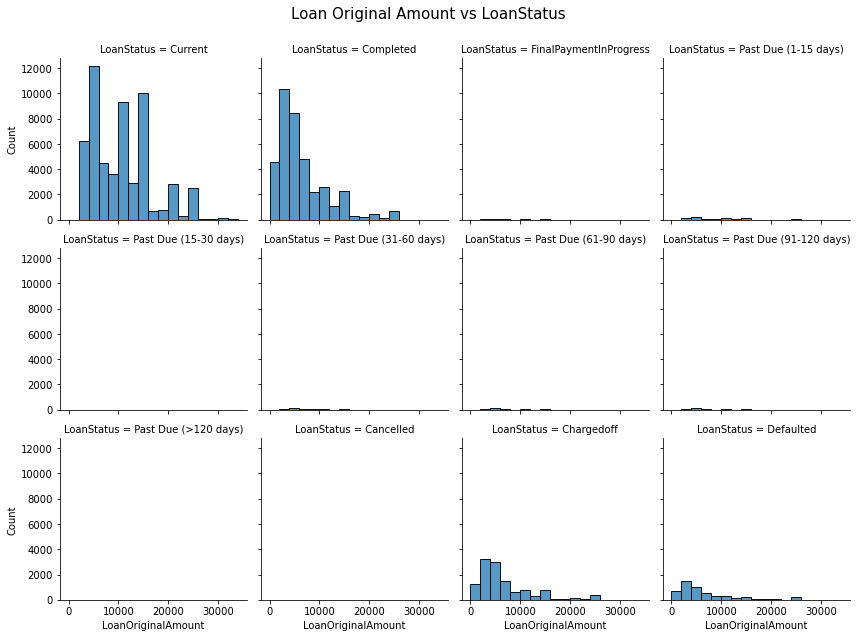

In [23]:
bins = np.arange(0,loans['LoanOriginalAmount'].max()+1000,2000)
g = sns.FacetGrid(data = loans,col='LoanStatus',col_wrap=4)
g.map(sns.histplot,'LoanOriginalAmount',bins=bins);
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Loan Original Amount vs LoanStatus', size=15);

In [24]:
cat_vars = ['BorrowerAPR', 'BorrowerRate']
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

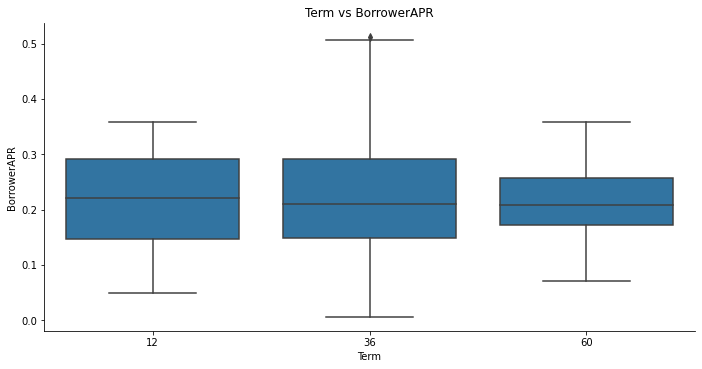

In [25]:
plt.rcParams["figure.figsize"] = (8,8)
g = sns.PairGrid(data = loans, x_vars = ['Term'], y_vars = 'BorrowerAPR', height = 5, aspect = 2);
g.map(boxgrid);
plt.title('Term vs BorrowerAPR')
plt.show();

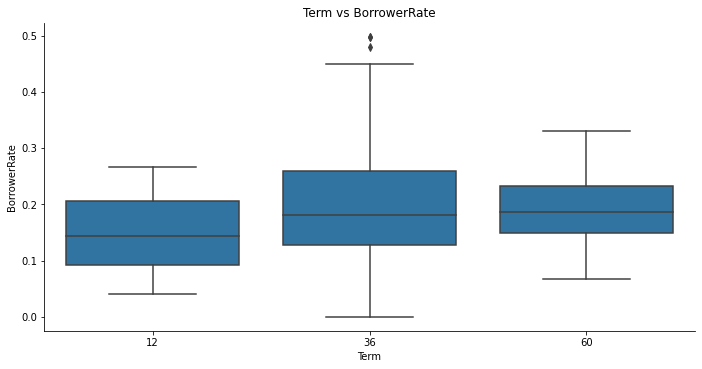

In [26]:
plt.rcParams["figure.figsize"] = (8,8)
g = sns.PairGrid(data = loans, x_vars = ['Term'], y_vars = 'BorrowerRate', height = 5, aspect = 2)
g.map(boxgrid)
plt.title('Term vs BorrowerRate')
plt.show();

> The plot shows that for Term 60, the `BorrowerRate` and `BorrowerAPR` has few variety compare to Term 36 with high variety of BorrowerRate and BorrowerAPR. It suggest that loans in Term 60 has high  level of agreement on BorrowerRate value and BorrowerAPR value.

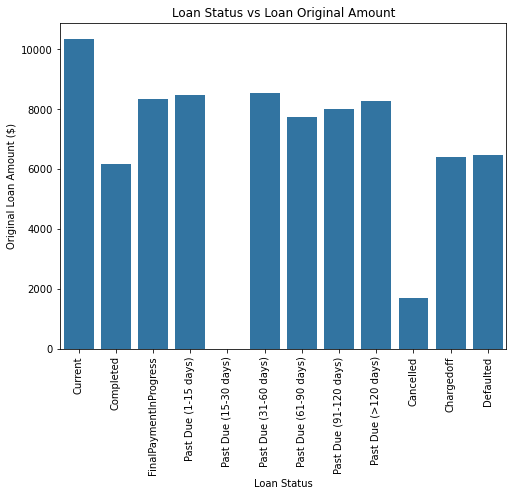

In [27]:
plt.figure(figsize = [8, 6])
default_color = sns.color_palette()[0]
sns.barplot(data = loans, x = 'LoanStatus', y= 'LoanOriginalAmount',ci=None, color=default_color)
plt.xlabel('Loan Status')
plt.title('Loan Status vs Loan Original Amount')
plt.ylabel('Original Loan Amount ($)')
plt.xticks(rotation=90);
plt.show()

> This plot shows that majority of original loan Amount above 7000 dollar stays past due days. It can be interpreted also that if original loan amount is above 7000 dollar has a high rate not to be paid back  before the due days.

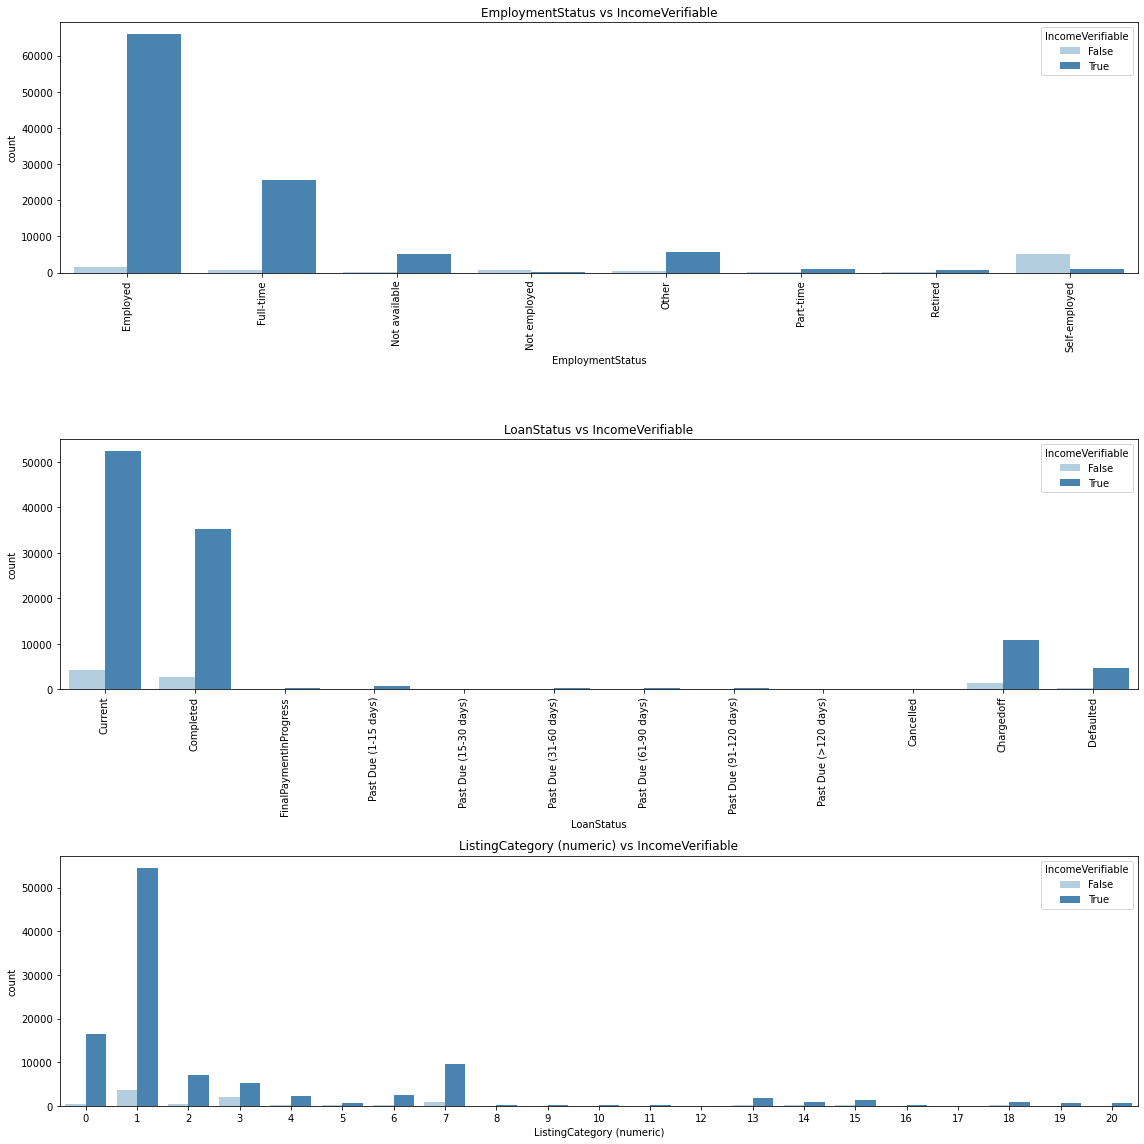

In [28]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [16, 16])

# subplot 1: EmploymentStatus vs IncomeVerifiable
plt.subplot(3, 1, 1)
ax2 = sns.countplot(data = loans, x = 'EmploymentStatus', hue = 'IncomeVerifiable', palette = 'Blues')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

# subplot 2: LoanStatus vs. IncomeVerifiable
ax = plt.subplot(3, 1, 2)
ax3 = sns.countplot(data = loans, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'Blues')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)

# subplot 3: ListingCategory (numeric) vs. IncomeVerifiable
ax = plt.subplot(3, 1, 3)
ax4 = sns.countplot(data = loans, x = 'ListingCategory (numeric)', hue = 'IncomeVerifiable', palette = 'Blues')
ax2.title.set_text('EmploymentStatus vs IncomeVerifiable')
ax3.title.set_text('LoanStatus vs IncomeVerifiable')
ax4.title.set_text('ListingCategory (numeric) vs IncomeVerifiable')
plt.tight_layout();
plt.show()

> As expected, majority of employmentstatus have varifiable income except selfemployed which have majority of unverifiable income. Similar to employmentstatus, loanstatus indicates that majority of the loans are to borrowers with verifiable income and the same result was obtained for listing category. It can be observed that majority of the loans are given to those with verifiable income.

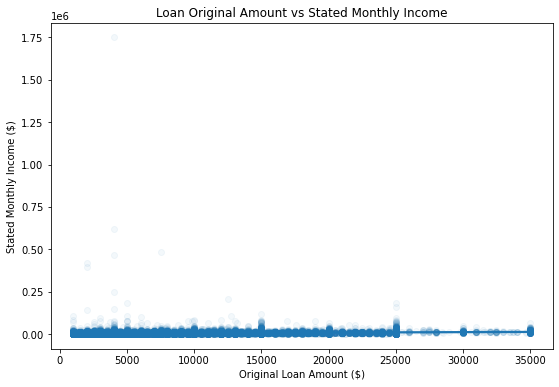

In [29]:
plt.figure(figsize = [9, 6])
sns.regplot(data = loans, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome',scatter_kws={'alpha':1/20})
plt.title('Loan Original Amount vs Stated Monthly Income')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Stated Monthly Income ($)')
plt.show()

In [30]:
loans[(loans['StatedMonthlyIncome']<1)]

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
78,359657,2008-06-29 23:23:40.157,36,Chargedoff,0.18454,0.1700,3,Full-time,True,False,0.000000,4800,2008-07-08,171.13
100,704916,2013-01-25 11:48:26.040,36,Chargedoff,0.35356,0.3134,13,Not employed,False,False,0.000000,4000,2013-01-30,172.76
108,321000,2008-04-29 08:26:00.340,36,Completed,0.28320,0.2600,1,Full-time,False,False,0.000000,14000,2008-05-09,564.07
125,506130,2011-05-10 12:53:38.783,36,Current,0.35643,0.3199,7,Not employed,False,False,0.000000,5000,2011-05-26,217.74
146,31745,2006-08-16 09:43:10.867,36,Completed,0.09939,0.0925,0,Other,False,False,0.083333,4000,2006-08-29,127.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113686,244319,2007-12-04 18:18:14.747,36,Completed,0.21588,0.2085,0,Full-time,False,False,0.000000,14900,2007-12-13,560.21
113761,580125,2012-04-18 11:49:35.887,60,Current,0.16151,0.1385,1,Not employed,False,False,0.000000,7000,2012-06-05,162.33
113766,579432,2012-04-16 17:49:05.693,36,Current,0.12427,0.0964,19,Not employed,False,False,0.000000,4500,2012-04-23,144.44
113767,269403,2008-01-22 07:15:09.207,36,Chargedoff,0.36945,0.3450,3,Self-employed,False,False,0.000000,5000,2008-02-04,224.77


> Some of the borrower stated that they earn less than 1 dollar as income Monthly. From for further observation on the table, majority of the income are not verifiable which may suggest an error occurred durring data entry or data transfer. 

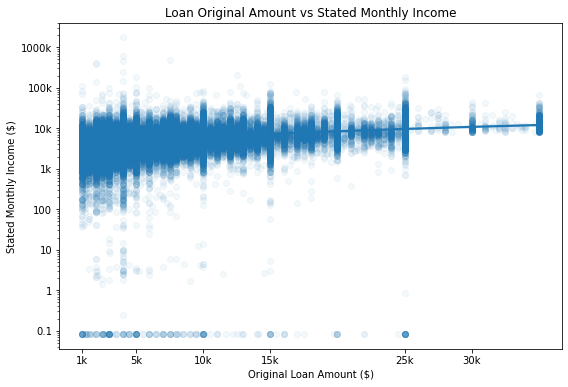

In [31]:
plt.figure(figsize = [9, 6])
sns.regplot(data = loans, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome',scatter_kws={'alpha':1/20})
plt.yscale('log')
plt.yticks([0.1, 1, 10, 100, 1000, 10000,100000,1000000],['0.1', '1', '10', '100','1k','10k','100k','1000k'])
plt.xticks([1000,5000,10000,15000,25000,30000],['1k','5k','10k','15k','25k','30k'])
plt.title('Loan Original Amount vs Stated Monthly Income')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Stated Monthly Income ($)')
plt.show()

> After apply log scale on the StatedMonthlyIncome axis, the plot shows that majority of the borrowers earns amount which lies in between 100 to 100k dollar. Also number of loans decrease as the amount increases. It also show that StatedMonthlyIncome and LoanOriginalAmount has close to zero correlation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The BorrowerRate and BorrowerAPR are highly correlated without applying transformation. StatedMonthlyIncome and LoanOriginalAmount has close to zero correlation. It is observed that Loan amount  has impact on loanstatus. Loans that take 60 months are close to have similar BorrowerRate and BorrowerAPR 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected observation where found, that majority of loans are given to those with verifiable income. LoanOriginalAmount and MonthlyLoanPayment shows apositive correlation.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the 3 measures of quality play into determining factor that affect laonstatus, borrowerRate and borrowerAPR.

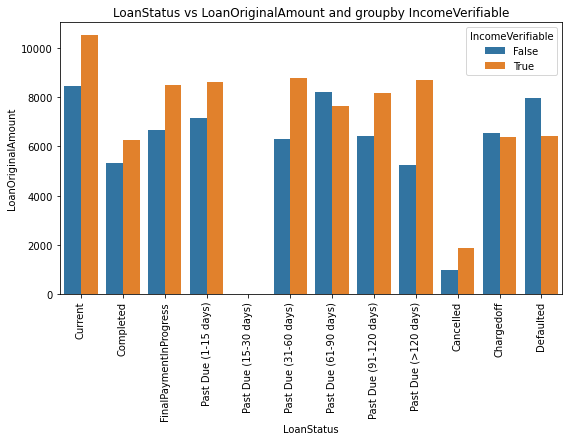

In [32]:
plt.figure(figsize = [9, 5])
sns.barplot(data=loans, x='LoanStatus', y='LoanOriginalAmount',hue='IncomeVerifiable',ci=None);
plt.title('LoanStatus vs LoanOriginalAmount and groupby IncomeVerifiable')
plt.xticks(rotation=90);

> From the plot, defaulted loans is high for unverifiable income and completed loans is high verifiable income

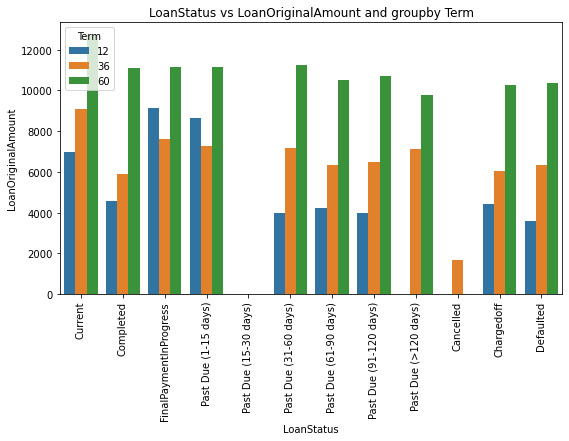

In [33]:
plt.figure(figsize = [9, 5])
sns.barplot(data=loans, x='LoanStatus', y='LoanOriginalAmount',hue='Term',ci=None);
plt.title('LoanStatus vs LoanOriginalAmount and groupby Term')
plt.xticks(rotation=90);

> Term for 60 months, its original loan amounts are high for loan status except cancelled loans. Loans for 36 months are has the highest probability of being cancelled compare to other Terms

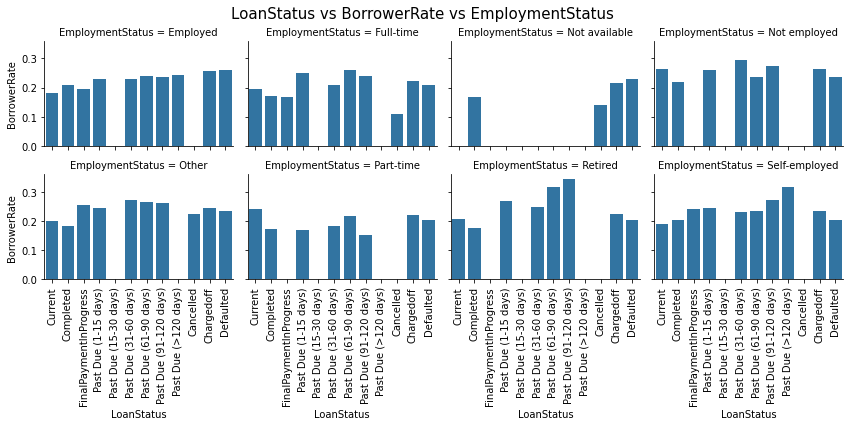

In [34]:
g = sns.FacetGrid(data = loans,col='EmploymentStatus',col_wrap=4)
g.map(sns.barplot,'LoanStatus','BorrowerRate',ci=None);
for tick in g.axes.flat:
    tick.set_xticklabels(tick.get_xticklabels(),rotation=90)
plt.tight_layout();
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('LoanStatus vs BorrowerRate vs EmploymentStatus', size=15)
plt.show()

>Employed and Self-employed borrowers do not have a cancelled loan. Also Part-time, retired and Not employed are not in progress for their final payment but they have past the due days.

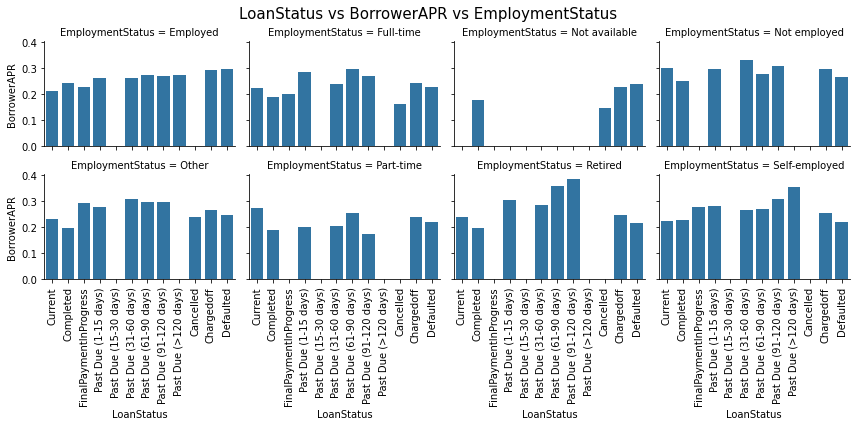

In [35]:
g = sns.FacetGrid(data = loans,col='EmploymentStatus',col_wrap=4)
g.map(sns.barplot,'LoanStatus','BorrowerAPR',ci=None);
for tick in g.axes.flat:
    tick.set_xticklabels(tick.get_xticklabels(),rotation=90)
plt.tight_layout();
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('LoanStatus vs BorrowerAPR vs EmploymentStatus', size=15)
plt.show()

>No retired borrower is in progress for final payment or above the due days. Also Part-time, retired and Not employed are not in progress for their final payment but they have pass the due days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> With respect to the original loan amount, majority of the loans falls in between completed and current  with some in current or chargedoff. Incomeverifiable and Term also prove to be factor in loan status,borrowerRate and BorrowerAPR

### Were there any interesting or surprising interactions between features?

> Intrestly, No concrete evidence that statedmonthlyincome affect borrwerrate or loanstatus, including IsBorrowerHomeowner.

## Conclusions
>The BorrowerRate and BorrowerAPR are highly correlated without applying transformation. StatedMonthlyIncome and LoanOriginalAmount has close to zero correlation. It is observed that Loan amount  has impact on loanstatus. Loans that take 60 months are close to have similar BorrowerRate and BorrowerAPR. With respect to the original loan amount, majority of the loans falls in between completed and current  with some in current or chargedoff. Incomeverifiable and Term also prove to be factor in loan status,borrowerRate and BorrowerAPR


